In [95]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [96]:
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

# RANDOM_SEED와 LABELS 설정
RANDOM_SEED = 42
LABELS = ["Sitting", "Jogging"]

In [97]:
df = pd.read_csv('C:/Users/abc99/OneDrive/바탕 화면/2023 2학기 파일 전체 모음/딥러닝응용/WISDM.csv', index_col=0)

In [98]:
df

,user-id,activity,timestamp,X,Y,Z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
1098199,19,Sitting,131623331483000,9.000000,-1.570000,1.690000
1098200,19,Sitting,131623371431000,9.040000,-1.460000,1.730000
1098201,19,Sitting,131623411592000,9.080000,-1.380000,1.690000
1098202,19,Sitting,131623491487000,9.000000,-1.460000,1.730000


In [99]:
df = df[['activity']]

In [100]:
df = pd.get_dummies(df, columns=['activity'])

In [101]:
df

,activity_Downstairs,activity_Jogging,activity_Sitting,activity_Standing,activity_Upstairs,activity_Walking
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
1098199,0,0,1,0,0,0
1098200,0,0,1,0,0,0
1098201,0,0,1,0,0,0
1098202,0,0,1,0,0,0


In [104]:
Jogging = df[df['activity_Jogging'] == 1].head(4499).copy()
Jogging['activity'] = 'Jogging'

Sitting = df[df['activity_Sitting'] == 1].head(4500).copy()
Sitting['activity'] = 'Sitting'

df_new = pd.concat([Jogging, Sitting])
df_new['activity'] = LabelEncoder().fit_transform(df_new['activity'])


In [105]:
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.callbacks import ModelCheckpoint, TensorBoard
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [106]:
# 데이터를 훈련 세트와 테스트 세트로 분리합니다
X_train, X_test = train_test_split(df_new, test_size=0.25, random_state=42)

# 정상 데이터만 사용하여 훈련합니다
normal = X_train[X_train['activity'] == 0]
X_train_normal_train = normal.drop(['activity'], axis=1).values

In [107]:
y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1).values

In [108]:
input_dim = X_train_normal_train.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [109]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h6", verbose=0, save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)

history = autoencoder.fit(X_train_normal_train, X_train_normal_train,
                    epochs=100,
                    batch_size=32,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/100
104/107 [============================>.] - ETA: 0s - loss: 0.1114 - accuracy: 0.5769  

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 3s 13ms/step - loss: 0.1091 - accuracy: 0.5858 - val_loss: 0.1039 - val_accuracy: 0.4889
Epoch 2/100
107/107 [==============================] - 0s 3ms/step - loss: 5.4389e-04 - accuracy: 1.0000 - val_loss: 0.1079 - val_accuracy: 0.4889
Epoch 3/100
107/107 [==============================] - 0s 2ms/step - loss: 4.3670e-04 - accuracy: 1.0000 - val_loss: 0.1078 - val_accuracy: 0.4889
Epoch 4/100
107/107 [==============================] - 0s 2ms/step - loss: 4.3195e-04 - accuracy: 1.0000 - val_loss: 0.1078 - val_accuracy: 0.4889
Epoch 5/100
107/107 [==============================] - 0s 3ms/step - loss: 4.2626e-04 - accuracy: 1.0000 - val_loss: 0.1077 - val_accuracy: 0.4889
Epoch 6/100
107/107 [==============================] - 0s 2ms/step - loss: 4.1965e-04 - accuracy: 1.0000 - val_loss: 0.1076 - val_accuracy: 0.4889
Epoch 7/100
107/107 [==============================] - 0s 2ms/step - loss: 4.1225e-04 - accuracy: 1.0000 - val_loss: 0.1074 - val_acc

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 1s 12ms/step - loss: 3.0111e-04 - accuracy: 1.0000 - val_loss: 0.1038 - val_accuracy: 0.4889
Epoch 20/100
 85/107 [======================>.......] - ETA: 0s - loss: 2.9404e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 1s 13ms/step - loss: 2.9323e-04 - accuracy: 1.0000 - val_loss: 0.1034 - val_accuracy: 0.4889
Epoch 21/100
 93/107 [=========================>....] - ETA: 0s - loss: 2.8539e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 1s 11ms/step - loss: 2.8486e-04 - accuracy: 1.0000 - val_loss: 0.1031 - val_accuracy: 0.4889
Epoch 22/100
101/107 [===========================>..] - ETA: 0s - loss: 2.7620e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 3s 29ms/step - loss: 2.7598e-04 - accuracy: 1.0000 - val_loss: 0.1027 - val_accuracy: 0.4889
Epoch 23/100
101/107 [===========================>..] - ETA: 0s - loss: 2.6751e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 1s 10ms/step - loss: 2.6729e-04 - accuracy: 1.0000 - val_loss: 0.1022 - val_accuracy: 0.4889
Epoch 24/100
103/107 [===========================>..] - ETA: 0s - loss: 2.5856e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 1s 11ms/step - loss: 2.5842e-04 - accuracy: 1.0000 - val_loss: 0.1018 - val_accuracy: 0.4889
Epoch 25/100
105/107 [============================>.] - ETA: 0s - loss: 2.4915e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 1s 10ms/step - loss: 2.4909e-04 - accuracy: 1.0000 - val_loss: 0.1013 - val_accuracy: 0.4889
Epoch 26/100
102/107 [===========================>..] - ETA: 0s - loss: 2.3946e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 1s 11ms/step - loss: 2.3926e-04 - accuracy: 1.0000 - val_loss: 0.1009 - val_accuracy: 0.4889
Epoch 27/100
101/107 [===========================>..] - ETA: 0s - loss: 2.2923e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 1s 10ms/step - loss: 2.2897e-04 - accuracy: 1.0000 - val_loss: 0.1005 - val_accuracy: 0.4889
Epoch 28/100
 89/107 [=======================>......] - ETA: 0s - loss: 2.1932e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 1s 11ms/step - loss: 2.1859e-04 - accuracy: 1.0000 - val_loss: 0.1002 - val_accuracy: 0.4889
Epoch 29/100
 89/107 [=======================>......] - ETA: 0s - loss: 2.1043e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 1s 12ms/step - loss: 2.0971e-04 - accuracy: 1.0000 - val_loss: 0.1000 - val_accuracy: 0.4889
Epoch 30/100
 86/107 [=======================>......] - ETA: 0s - loss: 2.0151e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 1s 10ms/step - loss: 2.0063e-04 - accuracy: 1.0000 - val_loss: 0.0998 - val_accuracy: 0.4889
Epoch 31/100
 95/107 [=========================>....] - ETA: 0s - loss: 1.9191e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 1s 11ms/step - loss: 1.9148e-04 - accuracy: 1.0000 - val_loss: 0.0996 - val_accuracy: 0.4889
Epoch 32/100
 93/107 [=========================>....] - ETA: 0s - loss: 1.8368e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 1s 10ms/step - loss: 1.8316e-04 - accuracy: 1.0000 - val_loss: 0.0995 - val_accuracy: 0.4889
Epoch 33/100
 97/107 [==========================>...] - ETA: 0s - loss: 1.7491e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 1s 11ms/step - loss: 1.7452e-04 - accuracy: 1.0000 - val_loss: 0.0994 - val_accuracy: 0.4889
Epoch 34/100
 91/107 [========================>.....] - ETA: 0s - loss: 1.6611e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 1s 13ms/step - loss: 1.6545e-04 - accuracy: 1.0000 - val_loss: 0.0994 - val_accuracy: 0.4889
Epoch 35/100
107/107 [==============================] - 0s 3ms/step - loss: 1.5660e-04 - accuracy: 1.0000 - val_loss: 0.0995 - val_accuracy: 0.4889
Epoch 36/100
107/107 [==============================] - 0s 2ms/step - loss: 1.4770e-04 - accuracy: 1.0000 - val_loss: 0.0996 - val_accuracy: 0.4889
Epoch 37/100
107/107 [==============================] - 0s 2ms/step - loss: 1.3831e-04 - accuracy: 1.0000 - val_loss: 0.0999 - val_accuracy: 0.4889
Epoch 38/100
107/107 [==============================] - 0s 4ms/step - loss: 1.2929e-04 - accuracy: 1.0000 - val_loss: 0.1002 - val_accuracy: 0.4889
Epoch 39/100
107/107 [==============================] - 0s 3ms/step - loss: 1.2036e-04 - accuracy: 1.0000 - val_loss: 0.1007 - val_accuracy: 0.4889
Epoch 40/100
107/107 [==============================] - 0s 3ms/step - loss: 1.1084e-04 - accuracy: 1.0000 - val_loss: 0.1014

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 1s 11ms/step - loss: 5.2188e-05 - accuracy: 1.0000 - val_loss: 0.0985 - val_accuracy: 0.4889
Epoch 50/100
 94/107 [=========================>....] - ETA: 0s - loss: 4.7593e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 1s 11ms/step - loss: 4.7303e-05 - accuracy: 1.0000 - val_loss: 0.0977 - val_accuracy: 0.4889
Epoch 51/100
100/107 [===========================>..] - ETA: 0s - loss: 4.2283e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 1s 10ms/step - loss: 4.2125e-05 - accuracy: 1.0000 - val_loss: 0.0972 - val_accuracy: 0.4889
Epoch 52/100
 97/107 [==========================>...] - ETA: 0s - loss: 3.6850e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model.h6\assets


INFO:tensorflow:Assets written to: model.h6\assets


107/107 [==============================] - 1s 13ms/step - loss: 3.6608e-05 - accuracy: 1.0000 - val_loss: 0.0968 - val_accuracy: 0.4889
Epoch 53/100
107/107 [==============================] - 0s 3ms/step - loss: 3.2525e-05 - accuracy: 1.0000 - val_loss: 0.0973 - val_accuracy: 0.4889
Epoch 54/100
107/107 [==============================] - 0s 2ms/step - loss: 2.9641e-05 - accuracy: 1.0000 - val_loss: 0.0984 - val_accuracy: 0.4889
Epoch 55/100
107/107 [==============================] - 0s 2ms/step - loss: 2.6598e-05 - accuracy: 1.0000 - val_loss: 0.0997 - val_accuracy: 0.4889
Epoch 56/100
107/107 [==============================] - 0s 3ms/step - loss: 2.3349e-05 - accuracy: 1.0000 - val_loss: 0.1015 - val_accuracy: 0.4889
Epoch 57/100
107/107 [==============================] - 0s 3ms/step - loss: 1.9956e-05 - accuracy: 1.0000 - val_loss: 0.1036 - val_accuracy: 0.4889
Epoch 58/100
107/107 [==============================] - 0s 3ms/step - loss: 1.6333e-05 - accuracy: 1.0000 - val_loss: 0.1063

In [110]:
y_pred = autoencoder.predict(X_test)

71/71 [==============================] - 0s 1ms/step


In [111]:
error_df = pd.DataFrame({'reconstruction_error': np.mean(np.power(X_test - y_pred, 2), axis=1),
                        'true_class': y_test})

In [112]:
threshold = 2.9

y_pred = [0 if e > threshold else 1 for e in error_df.reconstruction_error.values]

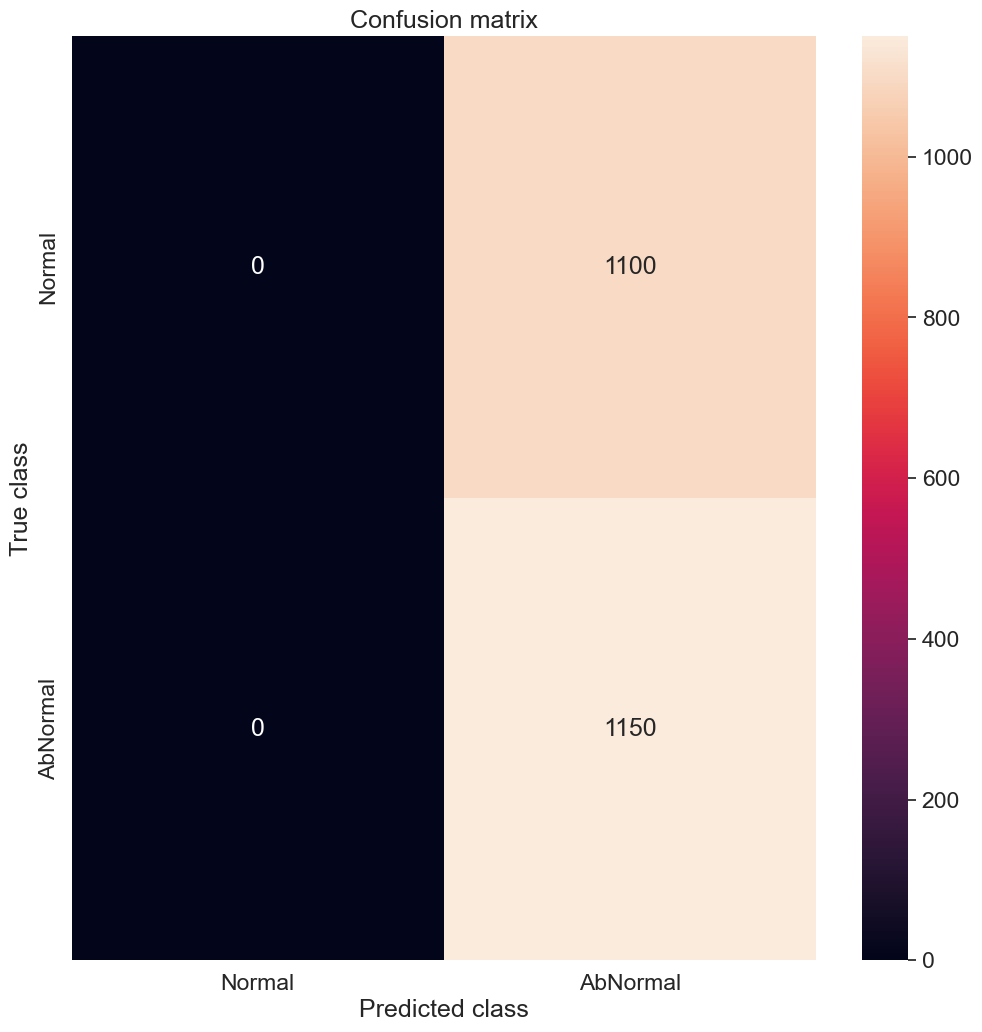

In [113]:
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=["Normal", "AbNormal"], yticklabels=["Normal", "AbNormal"], annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [114]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print('Accuracy Score :',accuracy_score(error_df.true_class, y_pred))
print('Precision :',precision)
print('Recall :',recall)
print('F1 :',f1)

Accuracy Score : 0.5111111111111111
Precision : 0.5111111111111111
Recall : 1.0
F1 : 0.676470588235294
